> Texto fornecido sob a Creative Commons Attribution license, CC-BY. Todo o código está disponível sob a FSF-approved BSD-3 license.<br>
> (c) Original por Lorena A. Barba, Gilbert F. Forsyth em 2017, traduzido por Felipe N. Schuch em 2020.<br>
> [@LorenaABarba](https://twitter.com/LorenaABarba) - [@fschuch](https://twitter.com/fschuch)

12 passos para Navier-Stokes
======
***

Você experimentou escolher diferentes parêmetros numéricos nos passos [1](./01_Passo_1.ipynb) e [2](./02_Passo_2.ipynb)? Se a resposta é sim, você provavelmente encontrou algum comportamento inesperado. Alguma vez sua resolução explodiu? (Na minha experiência, estudantes de CFD *amam* fazer as coisas explodirem).

Você provavelmente está se perguntando porque mudar os parâmetros de discretização afetam a solução de maneira tão drástica. Esse notebook é um complemento para nosso [curso CFD interativo](https://github.com/fschuch/CFDPython-BR), onde discutimos a condição CFL.

Convergência e Condição CFL
----
***

Para alguns dos primeiros passos, nós temos usado a mesma condição inicial e mesmas condições de contorno. Com os parâmetros que sugerimos inicialmente, a malha com 41 pontos e um passo de tempo de 0,025 segundos. Agora, vamos experimentar incrementar o tamanho da nossa malha. O código abaixo é idêntico ao que usamos no [Passo 1](./01_Passo_1.ipynb), mas aqui ele foi empacotado dentro de uma função, então podemos facilmente verificar o que acontece se ajustamos uma variável: **o tamanho da malha**.

In [1]:
import numpy                  #Aqui carregamos numpy
from matplotlib import pyplot #Aqui carregamos matplotlib
%matplotlib inline

def linearconv(nx):
    nt = 20   #Número de passos de tempo que queremos calcular
    dt = .025 #Tamanho de cada passo de tempo
    c = 1     #Velocidade de propagação da onda

    x = numpy.linspace(0., 2., num = nx)
    nx = x.size
    dx = x[1] - x[0]

    u = numpy.ones_like(x)   #Função ones_like do numpy
    u[(0.5<=x) & (x<=1)] = 2 #Define u = 2 entre 0,5 e 1,
                             #de acordo com nossa CI

    un = numpy.ones_like(u)  #Inicializar o arranjo temporário

    for n in range(nt): #Laço temporal
        un = u.copy() ##Cópia dos valores de u para un
        for i in range(1, nx): ##Laço espacial
            u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])
        
    pyplot.plot(x, u);

Vamos examinar os resultados do nosso problema de convecção linear à medida que refinamos a malha. 

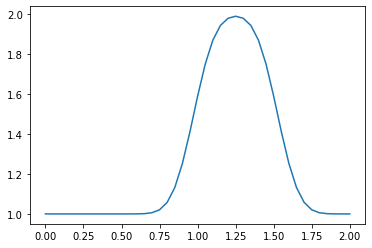

In [2]:
linearconv(41) #Convecção usando 41 pontos na malha

O obtemos o mesmo resultado que calculamos no Passo 1, reproduzido aqui for referência.

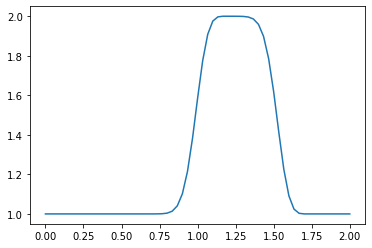

In [3]:
linearconv(61)

Aqui, ainda temos difusão numérica presente, embora menos severa.

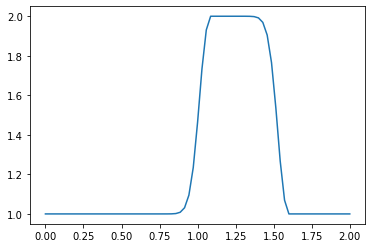

In [4]:
linearconv(71)

Aqui o mesmo padrão está presente: a onda é mais quadrada que nos testes anteriores.

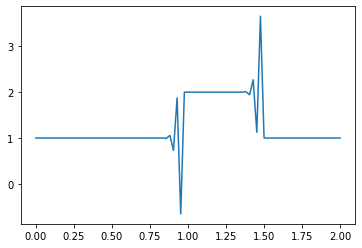

In [5]:
linearconv(85)

Isso não se parece em nada com a nossa função chapéu original.

### O que aconteceu?

Para responder essa questão, temos que pensar um pouco sobre o que realmente implementamos no nosso código.

Em cada interação do loop temporal, nós usamos os dados existentes sobre a nossa onda para estimar a velocidade da onda no passo de tempo subsequente. Inicialmente, o incremento no número de pontos retorno uma solução mais precisa. Existia menos difusão numérica e a onda quadrada foi parecendo muito mais como uma onda quadrada do que no exemplo inicial.

Cada iteração no laço temporal cobre o comprimento do passo de tempo $\Delta t$, que acabamos definindo como 0,025.

Durante essa iteração, calculamos a velocidade da onda para cada ponto que criamos ao longo de $x$. No último gráfico, alguma coisa claramente deu errado.

O que aconteceu é que durante o último período $\Delta t$, a onda viajou uma distância que é maior que `dx`. O comprimento `dx` de cada fração da malha está relacionado ao número total de pontos `nx`, então pode-se fazer cumprir a estabilidade se o passo de tempo $\Delta t$ é calculado com respeito à resolução da malha `dx`:

$$\sigma = \frac{u \Delta t}{\Delta x} \leq \sigma_{\max}$$

onde $u$ é a velocidade da onda, $sigma$ é denominado como [número de Courant](https://en.wikipedia.org/wiki/Courant%E2%80%93Friedrichs%E2%80%93Lewy_condition) e o valor de $\sigma_{\max}$ que vai garantir a estabilidade depende do tipo de ddiscretização utilizada.

Em uma nova versão do nosso código, vamos usar o número CFL para calcular o passo de tempo `dt` apropriado, em função do comprimento `dx`.

In [6]:
import numpy
from matplotlib import pyplot

def linearconv(nx):
    nt = 20    #Número de passos de tempo que queremos calcular
    c = 1      #Velocidade de propagação da onda
    sigma = .5

    x = numpy.linspace(0., 2., num = nx)
    nx = x.size
    dx = x[1] - x[0]

    dt = sigma * dx

    u = numpy.ones_like(x) 
    u[(0.5<=x) & (x<=1)] = 2

    un = numpy.ones_like(u)

    for n in range(nt):  #iterate through time
        un = u.copy() ##copy the existing values of u into un
        for i in range(1, nx):
            u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])
        
    pyplot.plot(x, u)

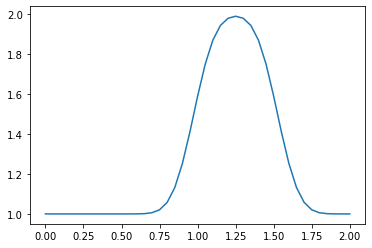

In [7]:
linearconv(41)

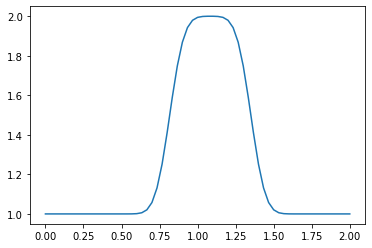

In [8]:
linearconv(61)

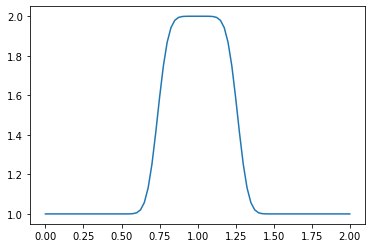

In [9]:
linearconv(81)

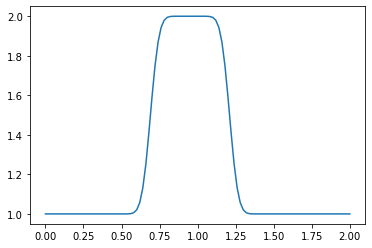

In [10]:
linearconv(101)

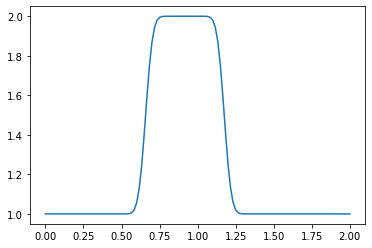

In [11]:
linearconv(121)

Note que conforme o número de pontos `nx` aumenta, a onda viaja por uma distância cada vez menor. O número de iterações temporais pelas quais a solução avança foi mantido constante em `nt = 20`. Entretanto, dependendo do valor de `nx` e o correspondente valor de `dx` e `dt`, uma janela temporal cada vez menor tem sido examinada, afinal de contas.

Leia o material complementar, ou avance para o [Passo 3](./04_Passo_3.ipynb).

Material Complementar
-----
***

É possível fazer uma análise rigososa sobre a estabilidade do esquema numérico, em alguns casos. Assista a apresentação da Prof. Barba sobre esse assunto em **Video Lecture 9**, no Youtube.

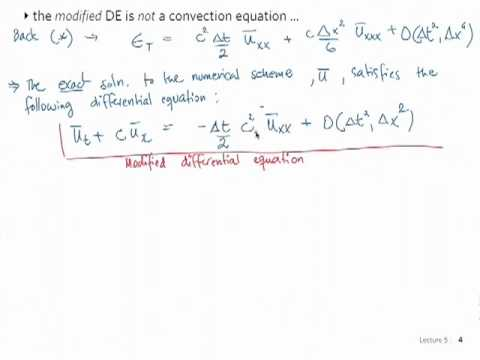

In [12]:
from IPython.display import YouTubeVideo
YouTubeVideo('Yw1YPBupZxU')

In [13]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

> A célula acima executa o estilo para esse notebook. Nós modificamos o estilo encontrado no GitHub de [CamDavidsonPilon](https://github.com/CamDavidsonPilon), [@Cmrn_DP](https://twitter.com/cmrn_dp).